In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


## Midterm Project for DATA 11800 - Fall  2022 (due November 10)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  Clarity and soundness of the arguments and conclusions; 
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the data vizualizations, summaries used, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.

The project is inspired from the current Fall Data Challenge from the American Statistical Association. You can find information about it here:
https://thisisstatistics.org/falldatachallenge/

The goal of the ASA Data challenge is to encourage contestants to "*dive into data on the impacts of school choice and family engagement in school activities and homework*" and to "*provide recommendations on factors that best optimize family involvement and support of K-12 students’ academic excellence*". Data about parent involvement in education and school choice from kindergarten to high school are currently collected in the [Parent and Family Involvement in Education (PFI)](https://nces.ed.gov/nhes/parent_involvement.asp).

Information about the data can be found [here](https://docs.google.com/document/d/1qXnbS4fjuQ9hbRxGaSmix3CGb3FUi6U5/) (there is an overview, links to the datasets, links to codebooks etc.):

The goal of this project is to gain insight into parent involvement using the tools you have learned so far in this class.

### The Data 

You can use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. 

There are two years of data provided in the challenge: 2019 and 2016, and we only provide the 2019 data. Also included are a codebook (a pdf file containing information about each variable), and the list of variables in this dataset (an Excel file that points each variable in the data frame to info in the pdf file). You can easily download the 2016 dataset as well if you need it for your analysis, but that is optional.  For 2019, the data has 15,500 rows and 75 columns. 


In [2]:
# the smaller dataset
proj1_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/PFI_2019.csv')
print(proj1_df.shape)
proj1_df.head(5)

(15500, 75)


,BASMID,ALLGRADEX,EDCPUB,SCCHOICE,SPUBCHOIX,SCONSIDR,SCHLHRSWK,EINTNET,MOSTIMPT,INTNUM,...,SEFUTUREX,DSBLTY,HHPARN19X,HHPARN19_BRD,NUMSIBSX,PARGRADEX,RACEETH,INTACC,CENREG,ZIPLOCL
0,20191000012,12,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,3,4,1,4,11
1,20191000029,4,1,2,3,2,4,3,-1,2,...,6,2,2,2,1,3,3,1,4,12
2,20191000059,11,2,2,2,1,4,3,2,2,...,5,2,2,2,1,5,2,3,2,11
3,20191000070,6,1,1,1,1,4,4,-1,-1,...,6,2,2,2,1,2,3,1,2,31
4,20191000078,9,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,5,5,1,2,21


In [3]:
# we need this for the note below
proj1_df.EDCPUB.value_counts()

1    13782
2     1718
Name: EDCPUB, dtype: int64

###  Note on the data

The codebook has table summaries for each variable but the numbers in there will not be the same as what you would obtain from these data. For example, for EDCPUB, the codebook shows 14,057 1's and 2,389 2's which is different than the output of the cell code above. The reason for this discrepancy: the dataset we provide has been curated (for example, the rows for home-schooled children were removed).


## The Assignment

### Report on your findings about schooling. 
Imagine you are serving as a consultant to a school district. You have been engaged to provide insights to the district on interpreting these survey results; the district would like to know where they should direct their attention for groups of students who may need help.

You must submit two files: 

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A PDF report of your findings. **This report should be at most 4 pages long including references.** Use data visualization and data summaries to justify your conclusions. Note that the page limitation means you will not show all analyses and plots you will make - select carefully what you think is most relevant.

The report should address the following points:

A.  **Introduce the dataset**.  Who, what, where, and why was this data generated?  

B.  **Characteristics of sample**. Describe the sample of students and families in the dataset.    Summarize the distribution of one of the characteristics of the parents and households.  Some interesting variables you may consider include: marital status, employment, age, income, own/rent etc.  Graphs or tables of student and family characteristics may help here.

C. **Relationships in the sample.**  Check the relationship beween two of the student characteristics (race, sex, language spoken...) and at least two of school grades (ALLGRADEX), whether students are in public (EDCPUB), and student disability (DSBLTY).  For example, do you find evidence that students in public/private schools, or disabled / not disabled status have higher grades?

D. **Relationships with outcome variables.**  The family involvement variables are the ones starting with FO, and variables that measure student success include  measure SEENJOY, SEGRADES, and possibly SEGRADEDQ and SEABSENT.  Choose a variable to measure success and check the degree to which variables in family involvement seem to affect success.

E. **Provide context**  What do the relationships you discovered imply?  What are some questions about parental involvement in education that you would like to answer but are unable to with the current data set alone?  What data would you need to be able to answer them?

F. **Conclusion** What did you learn from exploring this dataset?

Your submission is to be uploaded to Canvas.  
There are some minimum requirements for your submission:

1. Upload your report in PDF format and the jupyter notebook containing your analysis code.
2. The report should be 4 pages maximum, including bibliography, tables and figures.
3. If your report uses outside results and/or data, proper citations must be provided.
    


# EDA

Curated dataset codebook https://docs.google.com/spreadsheets/d/1X7fDKA_BZjSDwUCIo_3fax1viY1_wcJH/edit?usp=sharing&ouid=108879154306217142702&rtpof=true&sd=true

More complex code book https://nces.ed.gov/nhes/data/2019/pfi/cbook_pfi_pu.pdf

In [4]:
proj1_df.columns

Index(['BASMID', 'ALLGRADEX', 'EDCPUB', 'SCCHOICE', 'SPUBCHOIX', 'SCONSIDR',
       'SCHLHRSWK', 'EINTNET', 'MOSTIMPT', 'INTNUM', 'SEENJOY', 'SEGRADES',
       'SEABSNT', 'SEGRADEQ', 'FSSPORTX', 'FSVOL', 'FSMTNG', 'FSPTMTNG',
       'FSATCNFN', 'FSFUNDRS', 'FSCOMMTE', 'FSCOUNSLR', 'FSFREQ', 'FSNOTESX',
       'FSMEMO', 'FCSCHOOL', 'FCTEACHR', 'FCSTDS', 'FCORDER', 'FCSUPPRT',
       'FHHOME', 'FHWKHRS', 'FHAMOUNT', 'FHCAMT', 'FHPLACE', 'FHCHECKX',
       'FHHELP', 'FOSTORY2X', 'FOCRAFTS', 'FOGAMES', 'FOBUILDX', 'FOSPORT',
       'FORESPON', 'FOHISTX', 'FODINNERX', 'FOLIBRAYX', 'FOBOOKSTX',
       'HDHEALTH', 'CDOBMM', 'CDOBYY', 'CSEX', 'CSPEAKX', 'HHTOTALXX',
       'RELATION', 'P1REL', 'P1SEX', 'P1MRSTA', 'P1EMPL', 'P1HRSWK',
       'P1MTHSWRK', 'P1AGE', 'P2GUARD', 'TTLHHINC', 'OWNRNTHB', 'CHLDNT',
       'SEFUTUREX', 'DSBLTY', 'HHPARN19X', 'HHPARN19_BRD', 'NUMSIBSX',
       'PARGRADEX', 'RACEETH', 'INTACC', 'CENREG', 'ZIPLOCL'],
      dtype='object')

In [5]:
# Grades surveyed

grades = proj1_df.ALLGRADEX.value_counts()

df_grades = pd.DataFrame(grades)
df_grades = df_grades.reset_index()
df_grades.columns = ['grade', 'counts']
df_grades

,grade,counts
0,15,1615
1,13,1501
2,14,1494
3,12,1303
4,11,1266
5,10,1205
6,9,1154
7,8,1094
8,6,1016
9,7,993


Text(0.5, 1.0, 'amount of people per grade')

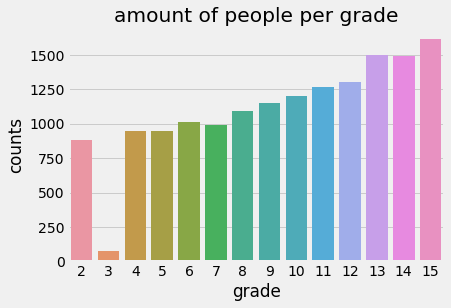

In [6]:
sns.barplot(data = df_grades, x = 'grade', y = 'counts')
plt.title('amount of people per grade')

In [7]:
#Public vs Private school
# 1 = public school, 2 = private
proj1_df.EDCPUB.value_counts()

1    13782
2     1718
Name: EDCPUB, dtype: int64

Text(0.5, 1.0, 'public vs private students')

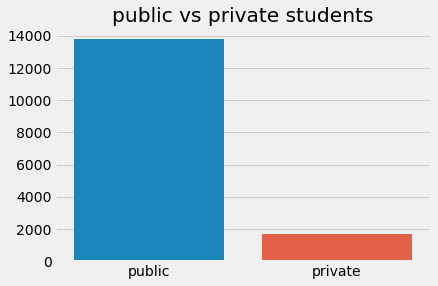

In [8]:
sns.barplot(['public','private'],[13782,1718])
plt.title('public vs private students')

In [9]:
#Sex
# 1 = Male, 2 = Female
proj1_df.CSEX.value_counts()

1    8055
2    7445
Name: CSEX, dtype: int64

Text(0.5, 1.0, 'Male vs Female')

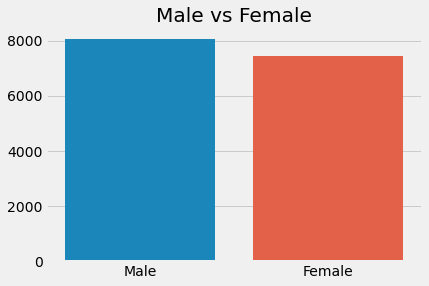

In [10]:
sns.barplot(['Male','Female'],[8055,7445])
plt.title('Male vs Female')

Text(0.5, 1.0, 'Public vs private vs gender')

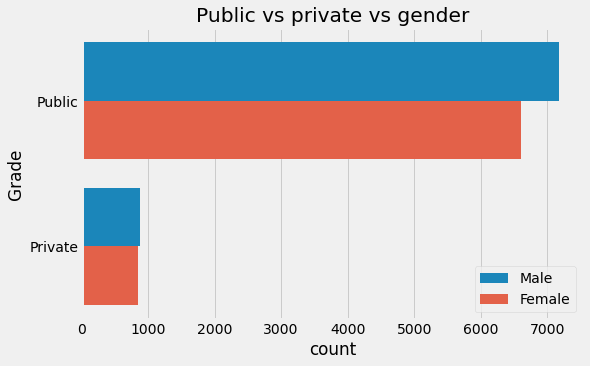

In [11]:
plt.figure(figsize=[8,5])
fig = sns.countplot(data=proj1_df, y="EDCPUB", hue = 'CSEX')
plt.legend(['Male',"Female"])
fig.set(yticklabels = ['Public','Private'])
plt.ylabel('Grade')
plt.title("Public vs private vs gender")

Text(0.5, 1.0, 'Race vs Public vs Private school')

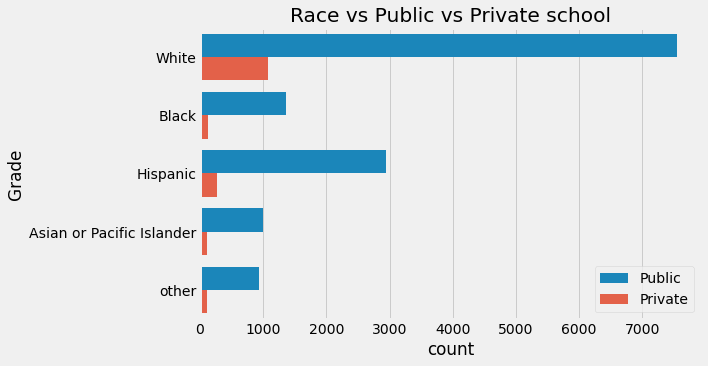

In [12]:
plt.figure(figsize=[8,5])
fig = sns.countplot(data=proj1_df, y="RACEETH", hue = 'EDCPUB')
plt.legend(['Public',"Private"])
fig.set(yticklabels = ['White','Black','Hispanic','Asian or Pacific Islander','other'])
plt.ylabel('Grade')
plt.title("Race vs Public vs Private school")

In [13]:
proj1_df["RACEETH"].value_counts(normalize = True)
proj1_df["EDCPUB"].value_counts(normalize = True)

1    0.889161
2    0.110839
Name: EDCPUB, dtype: float64

Text(0.5, 1.0, 'Gender vs disability')

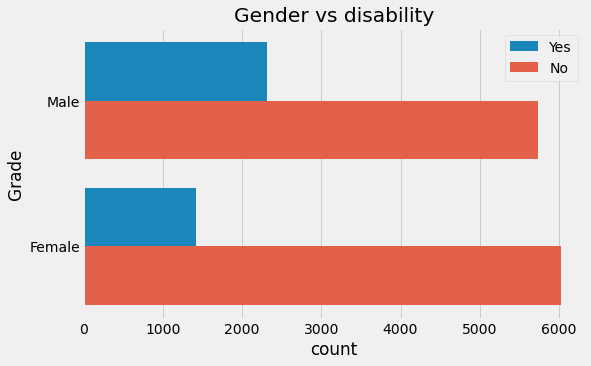

In [14]:
plt.figure(figsize=[8,5])
fig = sns.countplot(data=proj1_df, y="CSEX", hue = 'DSBLTY')
plt.legend(['Yes',"No"])
fig.set(yticklabels = ['Male',"Female"])
plt.ylabel('Grade')
plt.title("Gender vs disability")

Text(0.5, 1.0, 'Race vs disability')

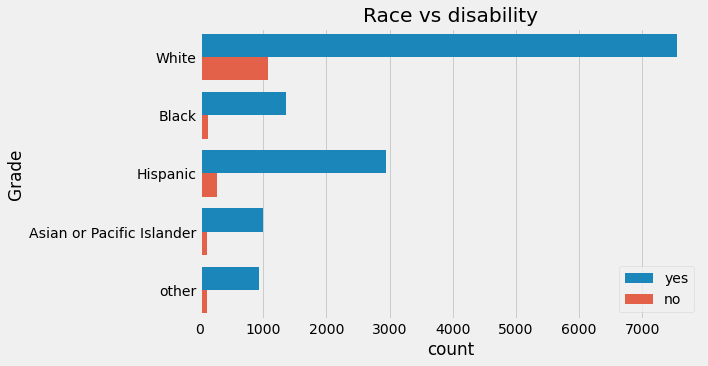

In [15]:
plt.figure(figsize=[8,5])
fig = sns.countplot(data=proj1_df, y="RACEETH", hue = 'EDCPUB')
plt.legend(['yes',"no"])
fig.set(yticklabels = ['White','Black','Hispanic','Asian or Pacific Islander','other'])
plt.ylabel('Grade')
plt.title("Race vs disability")

In [ ]:
# sns.countplot(data=df_grades, y="RACEETH")
# plt.legend(['Male',"Female"])
# plt.ylabel('Grade')
# plt.title("Number of Males vs Females in each grade who received A's")

Text(0.5, 1.0, 'Gender in each grade')

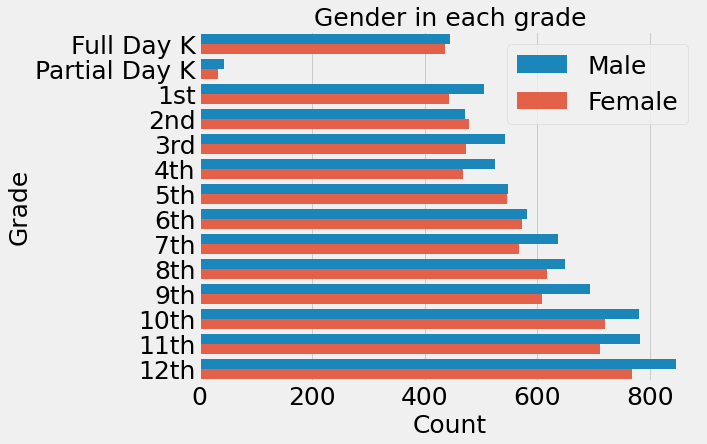

In [17]:
plt.figure(figsize=[8,6])
plot8 = sns.countplot(data=proj1_df, y="ALLGRADEX", hue = 'CSEX')
plot8.set(yticklabels = ["Full Day K","Partial Day K","1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th","11th","12th"])
plot8.tick_params(axis='both', which='major', labelsize=25)

plt.legend(['Male',"Female"], fontsize=25)
plt.ylabel('Grade', fontsize=25)
plt.xlabel('Count', fontsize=25)
plt.title("Gender in each grade", fontsize=25)

Text(0.5, 1.0, "Gender in each grade who received A's")

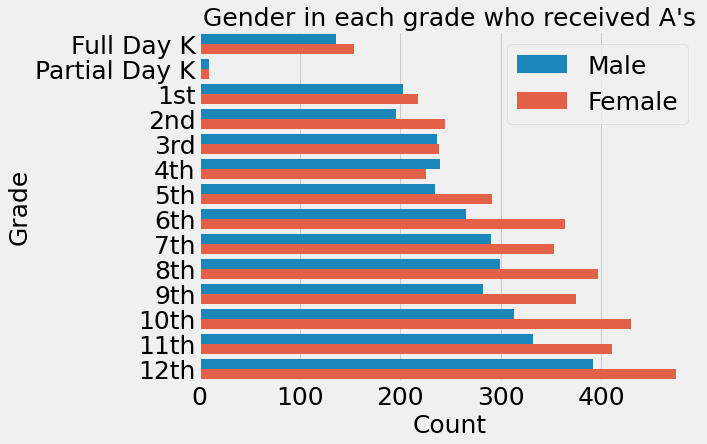

In [18]:
plt.figure(figsize=[8,6])
A = proj1_df.loc[proj1_df['SEGRADES']==1]
A
plot7 = sns.countplot(data=A, y="ALLGRADEX", hue = 'CSEX')
plot7.set(yticklabels = ["Full Day K","Partial Day K","1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th","11th","12th"])
plot7.tick_params(axis='both', which='major', labelsize=25)
plt.legend(['Male',"Female"], fontsize=25)
plt.ylabel('Grade', fontsize=25)
plt.xlabel('Count', fontsize=25)

plt.title("Gender in each grade who received A's", fontsize=25)

As grade increases there are a greater amount of males compared to females.

Text(0, 0.5, 'Grade')

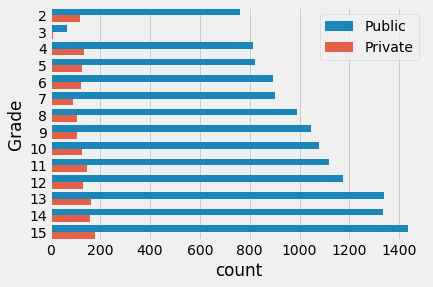

In [19]:
sns.countplot(data=proj1_df, y="ALLGRADEX", hue = 'EDCPUB')
plt.legend(['Public',"Private"])
plt.ylabel('Grade')

Text(0, 0.5, 'Grade')

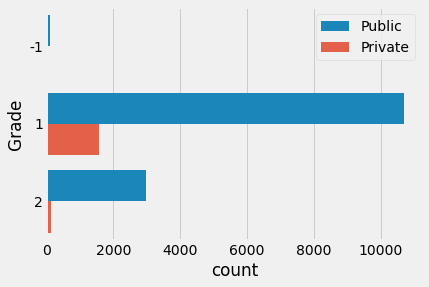

In [20]:
sns.countplot(data=proj1_df, y="FSSPORTX", hue = 'EDCPUB')
plt.legend(['Public',"Private"])
plt.ylabel('Grade')

Parental behaviors
marital status, employment, age, income, own/rent etc

<AxesSubplot:title={'center':'Marital Status'}, xlabel='amount of people', ylabel='Marital Status Categories'>

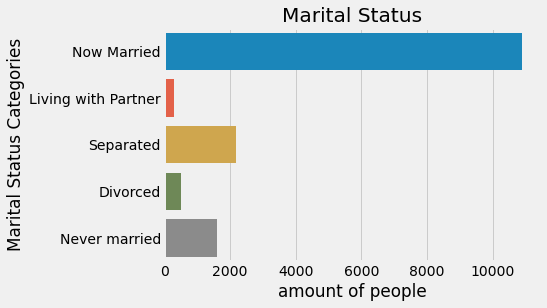

In [21]:
g = sns.countplot(data=proj1_df, y="P1MRSTA")
g.set(yticklabels = ['Now Married','Living with Partner','Separated','Divorced','Never married'])
plt.xlabel('amount of people')
plt.ylabel('Marital Status Categories')
plt.title('Marital Status')

g


In [ ]:
np.arange(7)

# Child engagement based on parents marital status

Since the beginning of this school year, has any adult in this child’s household done any
of the following things at this child’s school? a. Attended a school or class event, such as a play,
dance, sports event, or science fair

Text(0.5, 1.0, 'Marital Status Vs Adult in household attending class evnets')

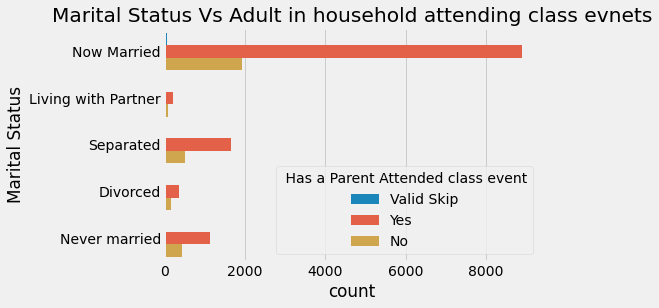

In [59]:
plot1 = sns.countplot(data=proj1_df, y="P1MRSTA", hue = 'FSSPORTX')
plot1.set(yticklabels = ['Now Married','Living with Partner','Separated','Divorced','Never married'])
plot1.legend(['Valid Skip',"Yes",'No'], title = ' Has a Parent Attended class event')
plt.ylabel('Marital Status')
plt.title('Marital Status Vs Adult in household attending class evnets')


Since the beginning of this school year, has any adult in this child’s household done any
of the following things at this child’s school? b. Served as a volunteer in this child’s classroom or
elsewhere in the school

Text(0.5, 1.0, 'Marital Status Vs Adult in household voulenteering')

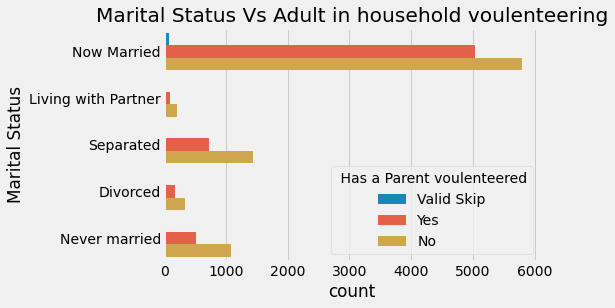

In [60]:
plot1 = sns.countplot(data=proj1_df, y="P1MRSTA", hue = 'FSVOL')
plot1.set(yticklabels = ['Now Married','Living with Partner','Separated','Divorced','Never married'])
plot1.legend(['Valid Skip',"Yes",'No'], title = ' Has a Parent voulenteered')
plt.ylabel('Marital Status')
plt.title('Marital Status Vs Adult in household voulenteering')

Text(0.5, 1.0, 'Marital Status Vs Grades received')

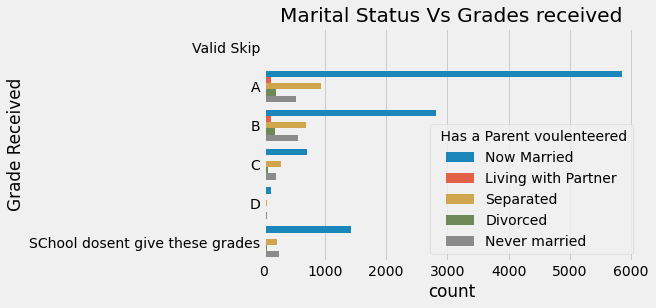

In [61]:
plot1 = sns.countplot(data=proj1_df, y="SEGRADES", hue = 'P1MRSTA')
plot1.set(yticklabels = ['Valid Skip','A','B','C','D','SChool dosent give these grades'])
plot1.legend(['Now Married','Living with Partner','Separated','Divorced','Never married'], title = ' Has a Parent voulenteered')
plt.ylabel('Grade Received')
plt.title('Marital Status Vs Grades received')

# MACHINE LEARNING

I will uses differnt machine learning models to try and best predict what features most affect the grade a child receives.

In [62]:
proj1_df.columns

Index(['BASMID', 'ALLGRADEX', 'EDCPUB', 'SCCHOICE', 'SPUBCHOIX', 'SCONSIDR',
       'SCHLHRSWK', 'EINTNET', 'MOSTIMPT', 'INTNUM', 'SEENJOY', 'SEGRADES',
       'SEABSNT', 'SEGRADEQ', 'FSSPORTX', 'FSVOL', 'FSMTNG', 'FSPTMTNG',
       'FSATCNFN', 'FSFUNDRS', 'FSCOMMTE', 'FSCOUNSLR', 'FSFREQ', 'FSNOTESX',
       'FSMEMO', 'FCSCHOOL', 'FCTEACHR', 'FCSTDS', 'FCORDER', 'FCSUPPRT',
       'FHHOME', 'FHWKHRS', 'FHAMOUNT', 'FHCAMT', 'FHPLACE', 'FHCHECKX',
       'FHHELP', 'FOSTORY2X', 'FOCRAFTS', 'FOGAMES', 'FOBUILDX', 'FOSPORT',
       'FORESPON', 'FOHISTX', 'FODINNERX', 'FOLIBRAYX', 'FOBOOKSTX',
       'HDHEALTH', 'CDOBMM', 'CDOBYY', 'CSEX', 'CSPEAKX', 'HHTOTALXX',
       'RELATION', 'P1REL', 'P1SEX', 'P1MRSTA', 'P1EMPL', 'P1HRSWK',
       'P1MTHSWRK', 'P1AGE', 'P2GUARD', 'TTLHHINC', 'OWNRNTHB', 'CHLDNT',
       'SEFUTUREX', 'DSBLTY', 'HHPARN19X', 'HHPARN19_BRD', 'NUMSIBSX',
       'PARGRADEX', 'RACEETH', 'INTACC', 'CENREG', 'ZIPLOCL'],
      dtype='object')

### Split into features and train and test sets

In [63]:
col_length = len(proj1_df.columns)
df2 = proj1_df[proj1_df['SEGRADES'] !=-1]
df2 = df2[df2['SEGRADES'] !=5]

Y = df2['SEGRADES']
df3 = df2.drop(columns = ['SEGRADES','BASMID'])
X = df3

val_size = 0.25

from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression Model

In [65]:
logistic_model = LogisticRegression(multi_class="multinomial",max_iter=4000).fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(X_val)

logistic_model.score(X_val,Y_val)

C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7201536643026005

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, logistic_predictions))

              precision    recall  f1-score   support

           1       0.81      0.88      0.84      1915
           2       0.60      0.57      0.59      1104
           3       0.49      0.33      0.39       312
           4       0.48      0.26      0.34        53

    accuracy                           0.72      3384
   macro avg       0.59      0.51      0.54      3384
weighted avg       0.71      0.72      0.71      3384



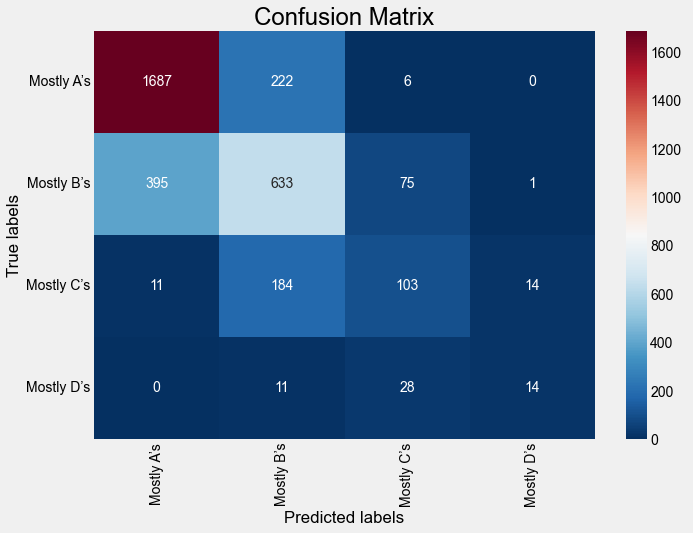

In [67]:
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(Y_val, logistic_predictions)
labels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s",]

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt="d", cmap="RdBu_r");
sns.set(font_scale=2)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

In [68]:
coef = logistic_model.coef_[0]
coef = abs(coef)
dataset = pd.DataFrame({'feature': df3.columns, 'weight': list(coef)}, columns=['feature', 'weight'])

dataset = dataset.sort_values(by=['weight'], ascending=False)
dataset.head(10)
# These are the top 10 most important features and their weights.
#There could be colineararity between some of the variables.

,feature,weight
11,SEGRADEQ,2.682816
9,SEENJOY,0.516907
48,CSEX,0.439534
19,FSCOUNSLR,0.396326
21,FSNOTESX,0.360505
64,DSBLTY,0.319827
22,FSMEMO,0.276363
24,FCTEACHR,0.260612
10,SEABSNT,0.253635
31,FHCAMT,0.241165


## SGD Model

In [69]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(max_iter=1000, alpha = 0.1, loss = 'modified_huber', penalty = 'none')

SGD.fit(X_train, Y_train)

SGD_predictions = SGD.predict(X_val)
SGD.score(X_val,Y_val)

0.6146572104018913

## Descision Tree classifier

In [36]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
tree_predictions = classifier.predict(X_val)
classifier.score(X_val,Y_val)

0.6385933806146572

## Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
forest_predictions = forest.predict(X_val)
forest.score(X_val,Y_val)

0.7198581560283688

## K nearest Neighbor classifier

In [38]:
k_classifier = KNeighborsClassifier(n_neighbors = 11)
k_classifier.fit(X_train, Y_train)
k_predictions = k_classifier.predict(X_val)
k_classifier.score(X_val,Y_val)

0.5768321513002365

# Lets create a Neural Network to see if that can preform better than the Logistic Regression Model

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

In [40]:
model = Sequential()

model.add(InputLayer(input_shape = (X_train.shape[1],) ))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(31, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation ='softmax'))

In [41]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                3700      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 31)                1581      
                                                                 
 dropout_1 (Dropout)         (None, 31)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 256       
                                                                 
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, Y_train, epochs = 100, batch_size = 25, verbose=1)

Epoch 1/100
406/406 [==============================] - 3s 4ms/step - loss: 21.4719 - accuracy: 0.4415
Epoch 2/100
406/406 [==============================] - 2s 4ms/step - loss: 1.6227 - accuracy: 0.5295
Epoch 3/100
406/406 [==============================] - 1s 3ms/step - loss: 1.2397 - accuracy: 0.5446
Epoch 4/100
406/406 [==============================] - 1s 3ms/step - loss: 1.1391 - accuracy: 0.5467
Epoch 5/100
406/406 [==============================] - 1s 3ms/step - loss: 1.0814 - accuracy: 0.5553
Epoch 6/100
406/406 [==============================] - 1s 3ms/step - loss: 1.0684 - accuracy: 0.5593
Epoch 7/100
406/406 [==============================] - 1s 3ms/step - loss: 1.0448 - accuracy: 0.5578
Epoch 8/100
406/406 [==============================] - 1s 3ms/step - loss: 1.0424 - accuracy: 0.5604
Epoch 9/100
406/406 [==============================] - 1s 3ms/step - loss: 1.0284 - accuracy: 0.5609
Epoch 10/100
406/406 [==============================] - 1s 3ms/step - loss: 1.0232 - accur

In [44]:
loss, acc = model.evaluate(X_val,Y_val)

106/106 [==============================] - 1s 4ms/step - loss: 0.9176 - accuracy: 0.5635


In [45]:
loss,acc

(0.9175841212272644, 0.5635342597961426)

This model did not preform great compared to the logistic regression. I could try hypertuning the parameters, however, due to time, I will leave the model how it is.

## Lets Explore the ten most important features more

In [46]:
noah =dataset.head(10)
noah
# noah.to_csv(r"C:\Users\noahb\Downloads\Data118 Project", index=False)
noah.to_csv('feature.csv')

# g = sns.boxplot(proj1_df["P1HRSWK"])
plt.xlabel('Hours')

plt.title('Parent One Hours Worked Per Week')

g

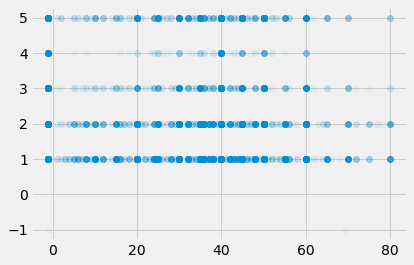

In [28]:
# sns.histplot(data=proj1_df, x='SEGRADES', y="P1HRSWK")

hours = pd.DataFrame({'grade': proj1_df['SEGRADES'], 'parent hours': proj1_df["P1HRSWK"]}, columns=['grade', 'parent hours'])
hours = hours[hours['parent hours']!=-1]
hours
plt.scatter(proj1_df["P1HRSWK"],proj1_df['SEGRADES'], alpha = .05)
# hours['parent hours'].value_counts()

In [29]:
MostlyA = hours[hours['grade']==1]
MostlyB = hours[hours['grade']==2]
MostlyC = hours[hours['grade']==3]
MostlyD = hours[hours['grade']==4]

Text(0.5, 1.0, 'Parent One Hours Worked Per Week')

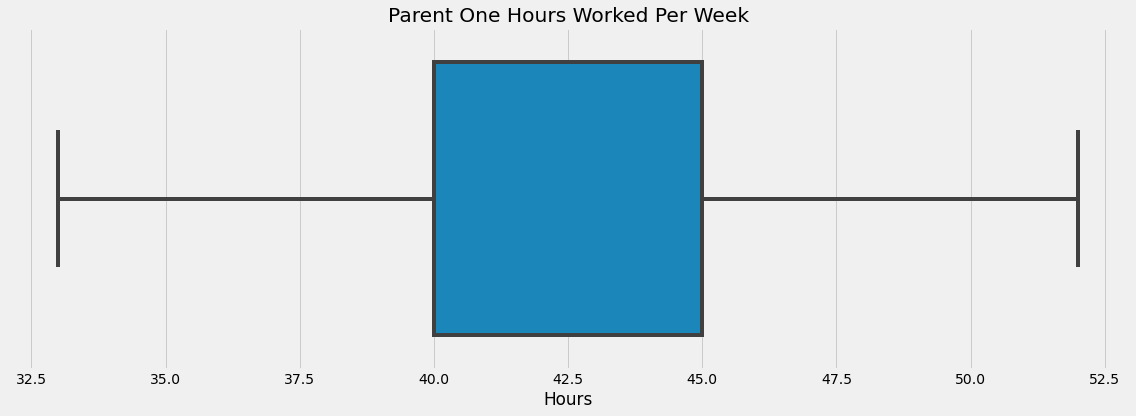

In [42]:
# plt.boxplot(MostlyA['parent hours'],showfliers=False)
A = sns.boxplot(MostlyA['parent hours'],showfliers=False)
plt.xlabel('Hours')
plt.title('Parent One Hours Worked Per Week')


Text(0.5, 1.0, 'Parent One Hours Worked Per Week')

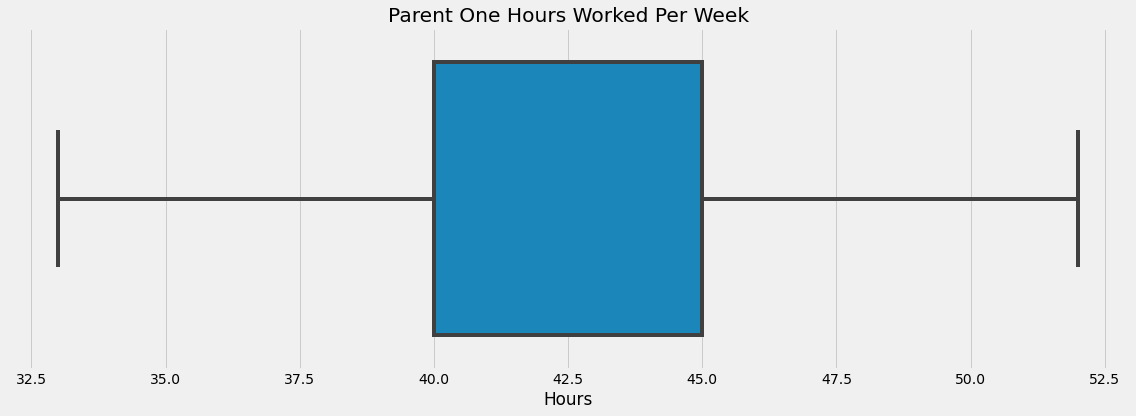

In [43]:
# plt.boxplot(MostlyA['parent hours'],showfliers=False)
A = sns.boxplot(MostlyD['parent hours'],showfliers=False)
plt.xlabel('Hours')
plt.title('Parent One Hours Worked Per Week')

Text(0.5, 1.0, 'Parent One Hours Worked Per Week')

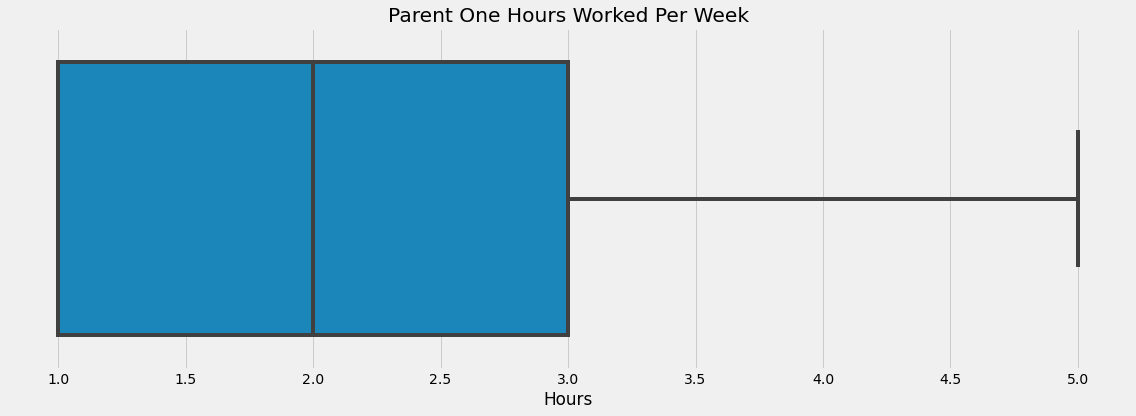

In [44]:
A = sns.boxplot(df2["SEGRADEQ"])
plt.xlabel('Hours')
plt.title('Parent One Hours Worked Per Week')

Text(0.5, 1.0, 'Counts of Grades received')

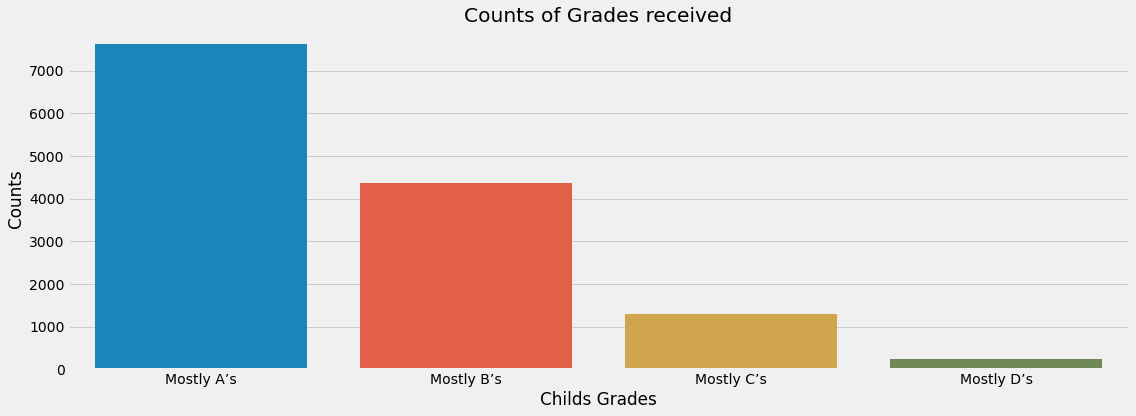

In [45]:
plot1 = sns.countplot(data=df2, x="SEGRADES")
plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
plt.ylabel('Counts')
plt.xlabel('Childs Grades')
plt.title('Counts of Grades received')

Text(0.5, 1.0, 'Counts How Parents Rank Their Childs Preformance')

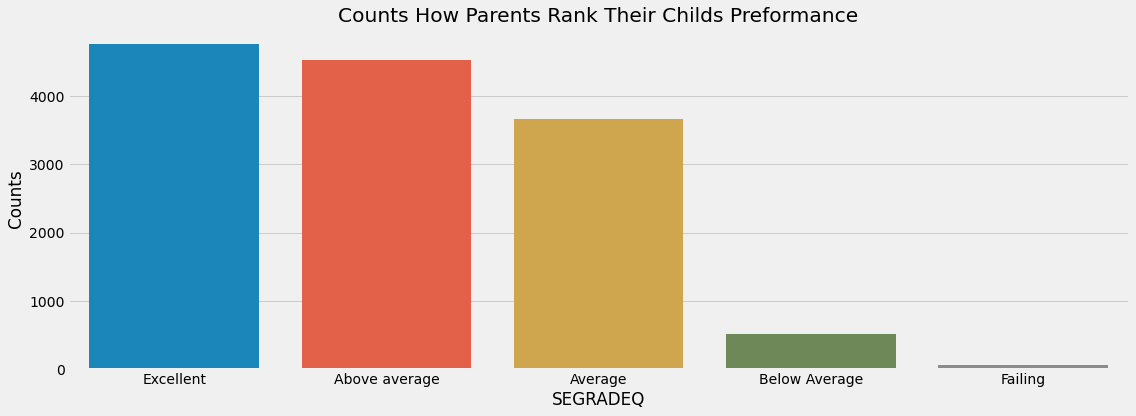

In [46]:
df2 = df2[df2['SEGRADEQ'] !=-1]
plot1 = sns.countplot(data=df2, x="SEGRADEQ")
plot1.set(xticklabels = ["Excellent","Above average","Average","Below Average","Failing"])
plt.ylabel('Counts')
plt.title('Counts How Parents Rank Their Childs Preformance')


<AxesSubplot:xlabel='SEGRADES'>

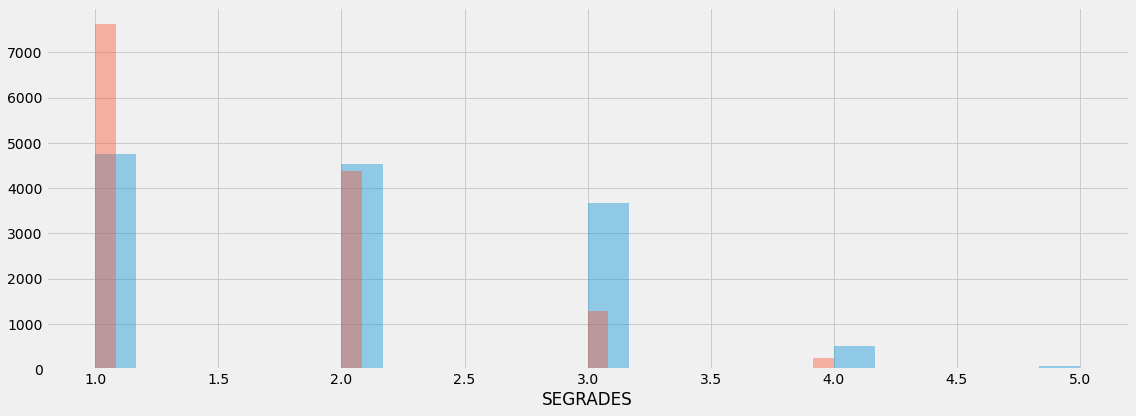

In [47]:
sns.distplot(df2["SEGRADEQ"], kde=False)
sns.distplot(df2["SEGRADES"], kde=False)


C:\Users\noahb\AppData\Local\Temp\ipykernel_15932\3209203842.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


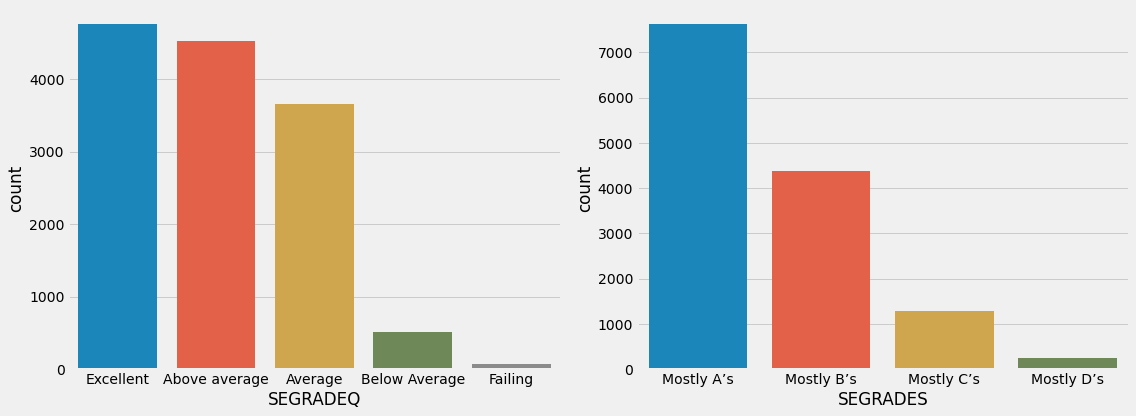

In [48]:
##Side by Side bar graph
plt.rcParams["figure.figsize"] = [16, 6]
plt.rcParams["figure.autolayout"] = True
fig, ax =plt.subplots(1,2)
plot1 = sns.countplot(df2["SEGRADEQ"], ax=ax[0])
plot1.set(xticklabels = ["Excellent","Above average","Average","Below Average","Failing"])
plot2= sns.countplot(df2["SEGRADES"], ax=ax[1])
plot2.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])

fig.show()

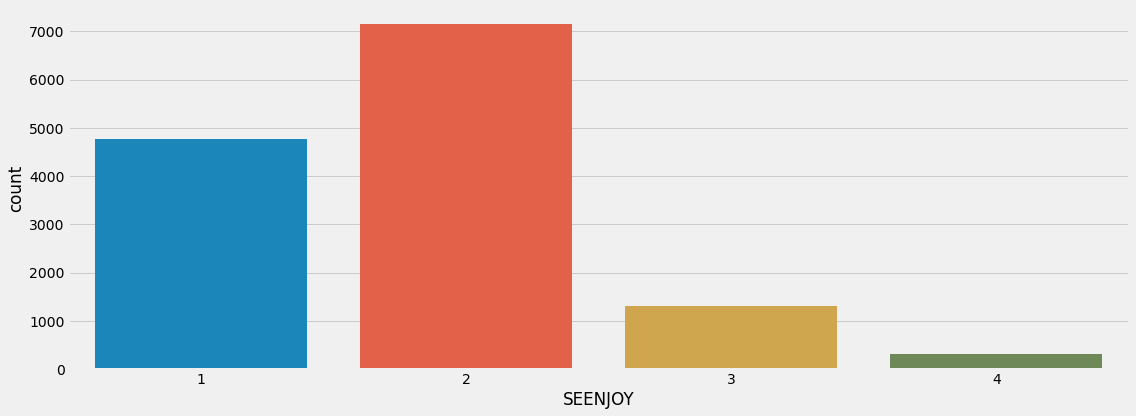

In [49]:
df2 = df2[df2['SEENJOY'] !=-1]
plot1 = sns.countplot(df2["SEENJOY"])

In [50]:
df2["SEGRADES"].where(df2["SEGRADES"]==1).count()/(len(df2["SEGRADES"]))

0.5629941624177935

Text(0.5, 1.0, 'Grades received and how much child Enjoys class')

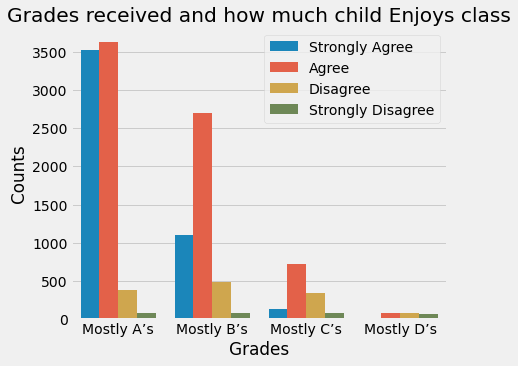

In [22]:
plt.figure(figsize=[6,5])
plot1 = sns.countplot(data=df2, x="SEGRADES", hue = 'SEENJOY')
plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
plot1.legend(['Strongly Agree',"Agree",'Disagree','Strongly Disagree'])
# sns.set(font_scale=2)
plt.ylabel('Counts')
plt.xlabel('Grades')
plt.title('Grades received and how much child Enjoys class')

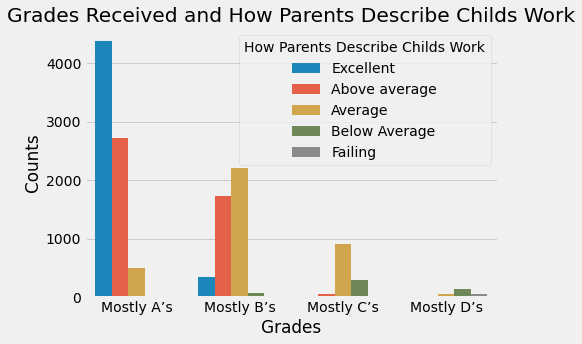

In [52]:
plt.figure(figsize=[7,5])
plot1 = sns.countplot(data=df2, x="SEGRADES", hue = 'SEGRADEQ')
plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
plot1.legend(["Excellent","Above average","Average","Below Average","Failing"], title = "How Parents Describe Childs Work")

plt.ylabel('Counts')
plt.xlabel('Grades')
plt.title('Grades Received and How Parents Describe Childs Work')
plt.savefig(r"C:\Users\noahb\Downloads\Data118 Project")

In [53]:
df2['CSEX']

0        2
2        1
3        1
4        1
6        2
        ..
15494    1
15495    2
15497    2
15498    2
15499    1
Name: CSEX, Length: 13533, dtype: int64

Text(0.5, 1.0, 'Grades Received and Childs Sex')

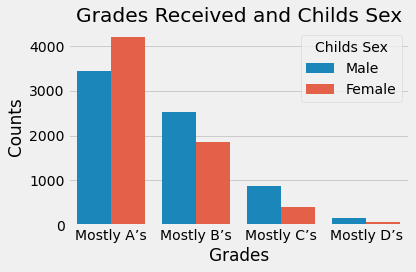

In [54]:
plt.figure(figsize=[6,4])
plot1 = sns.countplot(data=df2, x="SEGRADES", hue = 'CSEX')
plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
plot1.legend(["Male","Female"], title = "Childs Sex")
plt.ylabel('Counts')
plt.xlabel('Grades')
plt.title('Grades Received and Childs Sex')

In [55]:
# for column in df2.columns:
#     df2 = df2[df2[column] !=-1]
# len(df2.FSCOUNSLR ==-1)

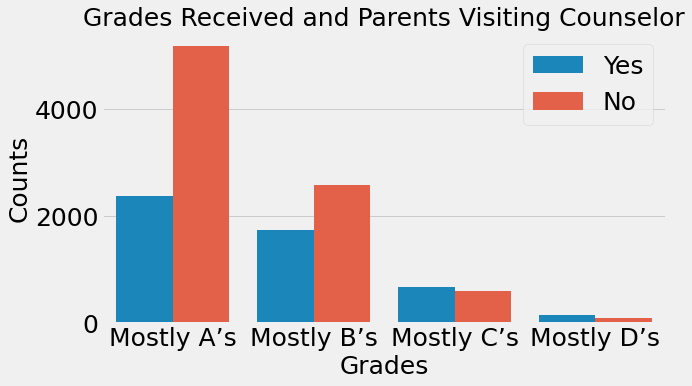

In [13]:
df2 = df2[df2['FSCOUNSLR'] !=-1]
plt.figure(figsize=[9,5])
plot1 = sns.countplot(data=df2, x="SEGRADES", hue = 'FSCOUNSLR')
plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
plot1.tick_params(axis='both', which='major', labelsize=25)
plot1.legend(["Yes","No"], fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.xlabel('Grades', fontsize=25)
plt.title('Grades Received and Parents Visiting Counselor', fontsize=25)
plt.savefig(r"C:\Users\noahb\Downloads\Data118 Project")

In [57]:
melt = pd.melt(df2,id_vars='SEGRADES',value_vars=['SEGRADEQ'])
melt

,SEGRADES,variable,value
0,1,SEGRADEQ,1
1,3,SEGRADEQ,4
2,1,SEGRADEQ,1
3,1,SEGRADEQ,1
4,1,SEGRADEQ,2
...,...,...,...
13412,4,SEGRADEQ,5
13413,1,SEGRADEQ,1
13414,1,SEGRADEQ,2
13415,1,SEGRADEQ,1


In [58]:
# plot2=sns.swarmplot(x='variable',y='value',hue='SEGRADES' , data=melt)
# plt.title('Grades Received and How Parents Describe Childs Work')
# plt.legend(["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"], title = "How Parents Describe Childs Work", loc = 7)
# plot2.set(yticklabels = ['',"Excellent","Above average","Average","Below Average","Failing"])


In [27]:
data = pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/PFI_2019.csv')

# Hand code the label
label1 = {"RACEETH": [1,2,3,4,5],
         "RACE_LABEL":["White", "Black", "Hispanic", "Asian", "Other"]}
label2 = {"EDCPUB": [1,2],
         "PUB_LABEL": ["Public", "Private"]}

label1 = pd.DataFrame(label1)
label2 = pd.DataFrame(label2)

In [28]:
# Now you will have a correctly-labeled dataset
data = pd.merge(pd.merge(data, label1, on = "RACEETH"), 
                label2, on = "EDCPUB") # If you are not familiar with the merge argument, review your homework 5
# Drop redundant columns
data.drop(["RACEETH", "EDCPUB"], axis = 1, inplace = True)

In [29]:
# Create a count dataframe
# If you are not faimilar with pivot_table argument, review your homework 5
count_df = pd.pivot_table(data, 
                          values ='BASMID', 
                          index =["PUB_LABEL"], columns = ['RACE_LABEL'],
                          aggfunc = np.sum)
# Display the dataframe
count_df

RACE_LABEL,Asian,Black,Hispanic,Other,White
PUB_LABEL,,,,,
Private,2382551227642,2685418557816,5532363031393,2221022237989,21866971926147
Public,20029582416651,27540675799459,59402259557803,18838309402433,152463096941959


In [30]:
# Translate the count dataframe into proportion
count_prop = count_df.div(count_df.sum(axis = 1), axis = 0)
count_prop

RACE_LABEL,Asian,Black,Hispanic,Other,White
PUB_LABEL,,,,,
Private,0.068685,0.077416,0.159488,0.064028,0.630384
Public,0.071978,0.098970,0.213467,0.067697,0.547889


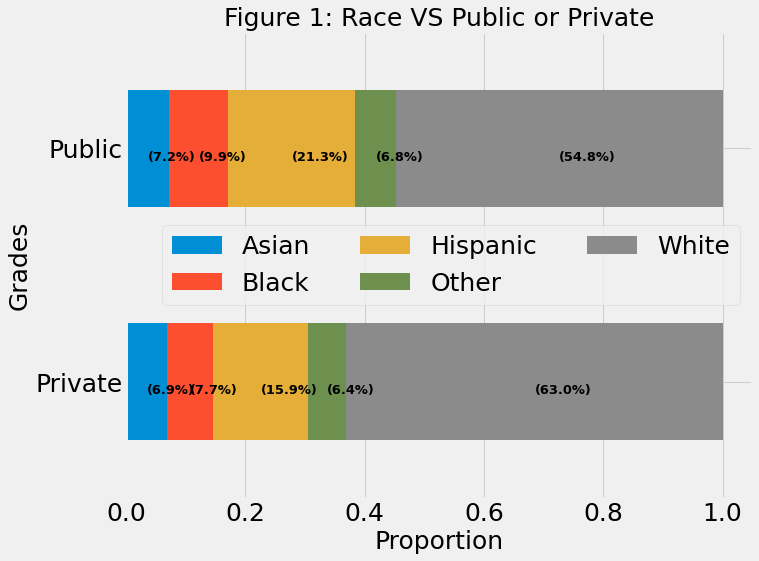

In [58]:
count_prop.plot(kind='barh', # proportion is horizental
                stacked=True, 
                 # you can choose whatever color you like
                figsize=(10, 8) # adjust the size
                )

plt.legend(ncol=3, fontsize=25) # change the legend position
plt.ylabel("Grades", fontsize=25)
plt.xlabel("Proportion", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

# put the proportion label
for n, x in enumerate([*count_df.index.values]):
    for (proportion, count, y_loc) in zip(count_prop.loc[x],
                                          count_prop.loc[x],
                                          count_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n-0.05,
                 s=f'({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=13,
                 fontweight="bold")

plt.title("Figure 1: Race VS Public or Private", fontsize=25) # Just an example, you should make your title more insightful
plt.show()